# imports

In [42]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

# data

In [43]:
# true_c_concentrations = trials['6000'].values
# true_c_concentrations = np.array([float(x) for x in true_c_concentrations])
# true_c_concentrations = -true_c_concentrations
# true_c_concentrations = true_c_concentrations.tolist()

# true_si_concentrations = trials['14000'].values
# true_si_concentrations = np.array([float(x) for x in true_si_concentrations])
# true_si_concentrations = -true_si_concentrations
# true_si_concentrations = true_si_concentrations.tolist()

# concentrations = [[si, c] for c, si in zip(true_c_concentrations, true_si_concentrations)]


In [44]:
generator_path = '../../simulations/SoilInSections2/data/'
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']

In [63]:
trials = '../../simulations/SoilInSections2/gen/inp/'+'df.pkl'
trials = pd.read_pickle(trials)
trials

,name,slice_level,lms
0,runWith1Slices,1,[0.15]
1,runWith2Slices,2,"[0.1166666667, 0.2166666667]"
2,runWith3Slices,3,"[0.1, 0.1666666667, 0.2333333333]"
3,runWith5Slices,5,"[0.0833333333, 0.1233333333, 0.1633333333, 0.2..."
4,runWith10Slices,10,"[0.0681818182, 0.0881818182, 0.1081818182, 0.1..."
5,runWith50Slices,50,"[0.0539215686, 0.0579215686, 0.0619215686, 0.0..."
6,runWith100Slices,100,"[0.051980198, 0.053980198, 0.055980198, 0.0579..."
7,runWith500Slices,500,"[0.0503992016, 0.0507992016, 0.0511992016, 0.0..."
8,runWith1000Slices,1000,"[0.0501998002, 0.0503998002, 0.0505998002, 0.0..."


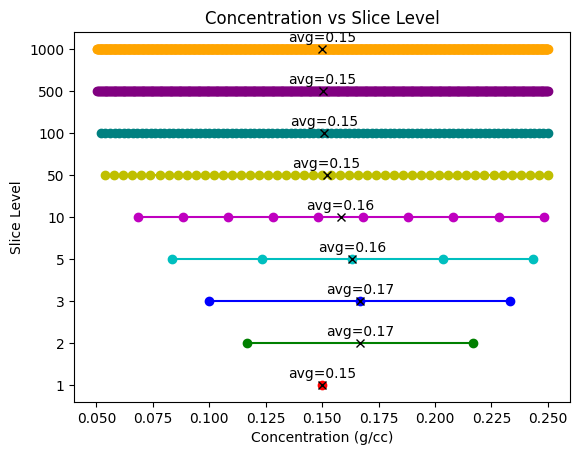

In [65]:
slice_levels = trials['slice_level']
lms = trials['lms']

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'teal', 'purple', 'orange']
for i in range(len(lms)):
    color = colors[i]
    plt.plot(lms[i], [i]*len(lms[i]), label=f"level {slice_levels[i]}", marker='o', color=color)
    plt.plot(np.average(lms[i]), [i], label=f"level {slice_levels[i]}", marker='x', color='black')
plt.xlabel('Concentration (g/cc)')
plt.ylabel('Slice Level')
plt.title('Concentration vs Slice Level')
plt.yticks(range(len(lms)), slice_levels)
# plt.legend()
# add annotation "x is the average
for i in range(len(lms)):
    avg = np.average(lms[i])
    plt.annotate(f'avg={avg:.2f}', (avg, i), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

In [98]:
from PIL import Image

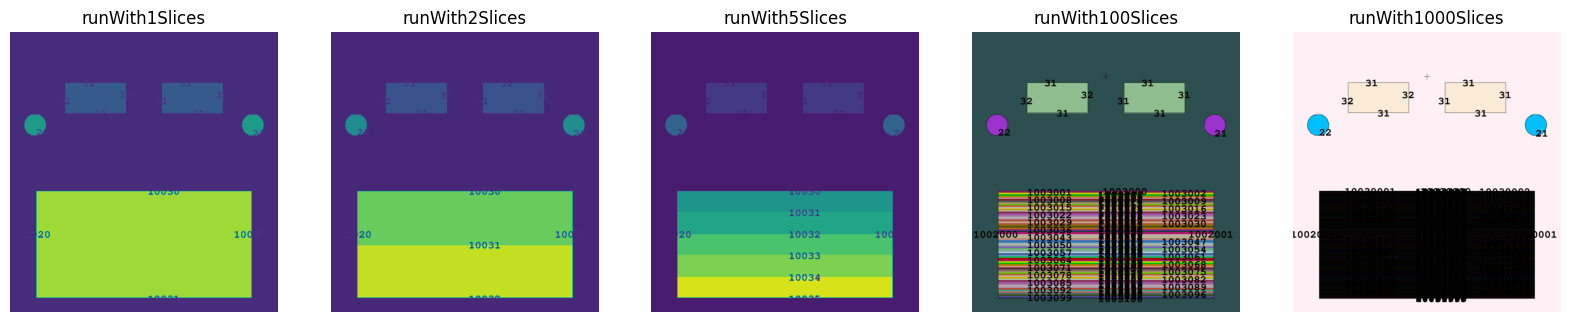

In [147]:
img_folder = '../../simulations/SoilInSections2/data/vis/'
indx_to_show = [0, 1, 3, -3, -1]
names = trials['name'].tolist()
fig, axs = plt.subplots(1, len(indx_to_show), figsize=(20, 5))
for _, i in enumerate(indx_to_show):
    image = Image.open(img_folder+names[i]+'.png')
    image_array = np.array(image)[350+750:-350, 1100+400:1100+1750-300]
    # if image_array.dtype.kind == 'U':  # Check if the dtype is unicode
    #     image_array = image_array.astype('float32')
    axs[_].imshow(image_array)
    axs[_].set_title(names[i])
    axs[_].axis('off')
plt.show()

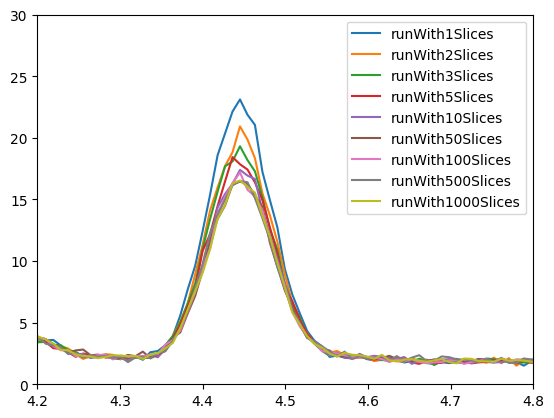

In [81]:
plt.figure()
for _, spectrum in enumerate(spectrums):
    plt.plot(bins, spectrum[0], label=trials['name'][_])
plt.legend()
# plt.xlim(1.6, 2.0)
# plt.ylim(0, 60)
plt.xlim(4.2, 4.8)
plt.ylim(0, 30)
plt.show()

# Add Spectrums

In [33]:
Analyzer = insd.Analyzer()

In [34]:
for _, spectrum in enumerate(spectrums):
    Analyzer.addSpectrum(
        [bins,spectrum[0]], 
        trials['name'][_]
        )

In [35]:
spec_labels = [i for i in Analyzer.spectrums.keys()]

In [36]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,runWith1Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.0, 8.4, 14.55, 20.5, 25....","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
1,runWith2Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.01, 8.290000000000001, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
2,runWith3Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7, 0.0, 8.43, 15.06, 20.439999999999998, 25...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
3,runWith5Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.66, 0.0, 8.959999999999999, 13.98, 20.84999...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
4,runWith10Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.51, 0.0, 9.139999999999999, 15.069999999999...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
5,runWith50Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.68, 0.01, 8.66, 14.87, 20.430000000000003, ...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
6,runWith100Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.859999999999999, 0.0, 8.01, 14.66, 20.64, 2...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
7,runWith500Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.53, 0.0, 8.0, 14.41, 19.07, 25.67, 38.84, 6...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
8,runWith1000Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7700000000000005, 0.01, 8.64, 15.5499999999...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False


# Calculate Peak Areas

In [38]:
regression_results, fits = Analyzer.calcPeakAreas(
    spec_labels, 
    returnFits=True, 
    peakWindows={
        'Si1': [1.6, 2.2], 
        'Si2C1': [4.3, 4.61]
        }, 
    baselineFunction='exp_falloff', 
    peakFunction='gaussian'
    )

In [39]:
fits

{'runWith1Slices': {'Si1': {'bins': array([1.60821, 1.61724, 1.62628, 1.63531, 1.64435, 1.65338, 1.66242,
          1.67145, 1.68049, 1.68952, 1.69856, 1.70759, 1.71663, 1.72566,
          1.7347 , 1.74373, 1.75277, 1.7618 , 1.77084, 1.77987, 1.7889 ,
          1.79794, 1.80697, 1.81601, 1.82504, 1.83408, 1.84311, 1.85215,
          1.86118, 1.87022, 1.87925, 1.88829, 1.89732, 1.90636, 1.91539,
          1.92443, 1.93346, 1.9425 , 1.95153, 1.96057, 1.9696 , 1.97864,
          1.98767, 1.99671, 2.00574, 2.01478, 2.02381, 2.03285, 2.04188,
          2.05091, 2.05995, 2.06898, 2.07802, 2.08705, 2.09609, 2.10512,
          2.11416, 2.12319, 2.13223, 2.14126, 2.1503 , 2.15933, 2.16837,
          2.1774 , 2.18644, 2.19547]),
   'baseline': [11.454361540709712,
    11.089062636743307,
    10.746103194224094,
    10.424829276440374,
    10.123202519440301,
    9.840647797465026,
    9.575372405511693,
    9.326870530658995,
    9.093565520599899,
    8.875012521826418,
    8.66982489655188,
  

In [40]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,runWith1Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.0, 8.4, 14.55, 20.5, 25....","{'Si1': 2.8645169766001266, 'Si2C1': 1.9795330...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
1,runWith2Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.01, 8.290000000000001, 1...","{'Si1': 3.0226331067508467, 'Si2C1': 1.7395282...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
2,runWith3Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7, 0.0, 8.43, 15.06, 20.439999999999998, 25...","{'Si1': 3.0179954718709237, 'Si2C1': 1.6404750...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
3,runWith5Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.66, 0.0, 8.959999999999999, 13.98, 20.84999...","{'Si1': 3.021913134063965, 'Si2C1': 1.56772389...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
4,runWith10Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.51, 0.0, 9.139999999999999, 15.069999999999...","{'Si1': 3.0858708292205117, 'Si2C1': 1.4698192...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
5,runWith50Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.68, 0.01, 8.66, 14.87, 20.430000000000003, ...","{'Si1': 3.0518330976958072, 'Si2C1': 1.3932765...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
6,runWith100Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.859999999999999, 0.0, 8.01, 14.66, 20.64, 2...","{'Si1': 3.048669601228805, 'Si2C1': 1.40797247...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
7,runWith500Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.53, 0.0, 8.0, 14.41, 19.07, 25.67, 38.84, 6...","{'Si1': 3.040739467229927, 'Si2C1': 1.44118350...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False
8,runWith1000Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.7700000000000005, 0.01, 8.64, 15.5499999999...","{'Si1': 3.0950846581380516, 'Si2C1': 1.3936037...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False


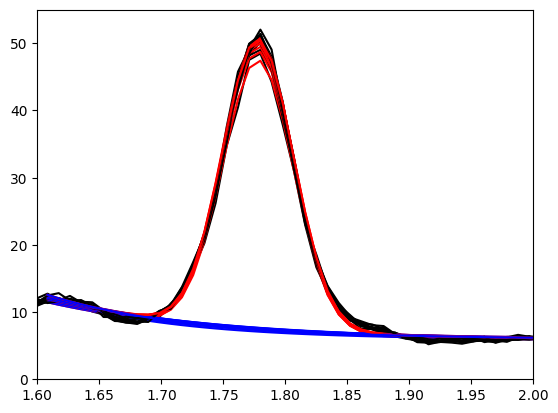

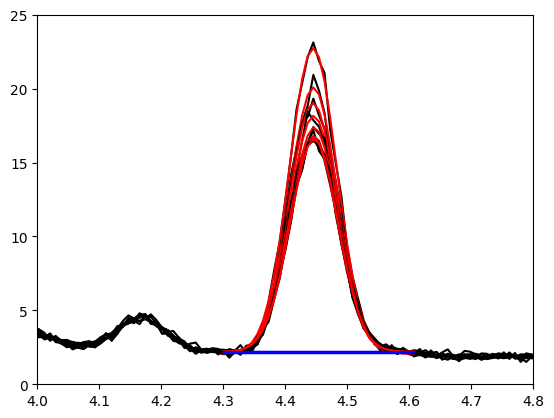

In [163]:
df = Analyzer.toDataFrame()
plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['baseline'], color='blue')
plt.xlim(1.6, 2)
plt.ylim(0, 55)
plt.show()

plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['baseline'], color='blue')
plt.xlim(4.0, 4.8)
plt.ylim(0, 25)
plt.show()


In [153]:
df.head(n=2)

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed,level,lms
0,runWith1Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.0, 8.4, 14.55, 20.5, 25....","{'Si1': 2.8645169766001266, 'Si2C1': 1.9795330...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False,1,[0.15]
1,runWith2Slices,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[4.569999999999999, 0.01, 8.290000000000001, 1...","{'Si1': 3.0226331067508467, 'Si2C1': 1.7395282...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False,False,2,"[0.1166666667, 0.2166666667]"


In [156]:
df['c_area'] = [x['Si2C1'] for x in df['areas']]

In [149]:
df['level'] = slice_levels
df['lms'] = lms

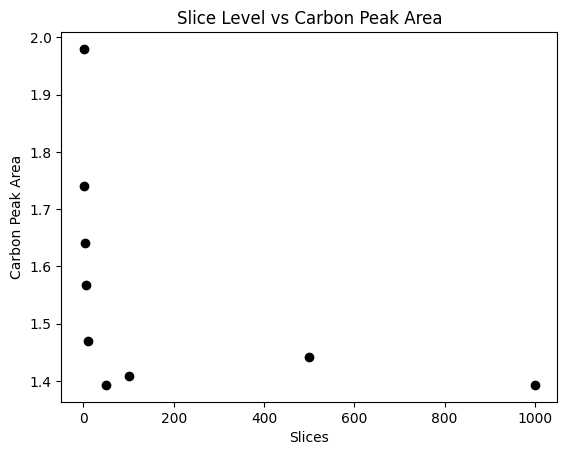

In [161]:
# slice level vs Si2C1 peak area
plt.figure()
for i in range(len(df)):
    plt.plot(df['level'][i], df['c_area'][i], marker='o', color='black')

plt.xlabel('Slices')
plt.ylabel('Carbon Peak Area')
plt.title('Slice Level vs Carbon Peak Area')
plt.show()

# Calibrate

In [15]:
Analyzer.calibrate(spec_labels, concentrations)

{'methods': {'Si1': 'original', 'Si2C1': 'original'},
 'weights': {'Si1': {'k1': np.float64(0.04827379893794271)},
  'Si2C1': {'k1': np.float64(0.1092636936211816),
   'k2': np.float64(22.431466970058658)}}}

In [16]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.999999999999996, 0.0, 398.0, 554.0, 596.0,...","{'Si1': 9.575438350871856, 'Si2C1': 1.96409442...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': None, 'Si2C1': None}",True,False
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[17.0, 0.0, 392.0, 575.0, 607.0, 694.000000000...","{'Si1': 9.76155482558933, 'Si2C1': 2.185504482...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': None, 'Si2C1': None}",True,False
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 1.0, 412.0, 579.0, 602.0, 675.0, 818.0,...","{'Si1': 8.905245056641341, 'Si2C1': 3.03880517...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': None, 'Si2C1': None}",True,False
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': 9.885984578758531, 'Si2C1': 1.37152521...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': None, 'Si2C1': None}",True,False
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 569.0, 583.0, 643.999999999...","{'Si1': 8.89266638449909, 'Si2C1': 3.108291713...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': None, 'Si2C1': None}",True,False
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 398.0, 609.0, 600.0, 658.0, 834.0,...","{'Si1': 9.333632371315147, 'Si2C1': 0.98181116...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': None, 'Si2C1': None}",True,False
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': 10.597000132935221, 'Si2C1': 1.3673155...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': None, 'Si2C1': None}",True,False
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 401.0, 593.0, 592.0, 645.0, 802.0,...","{'Si1': 8.718305045179338, 'Si2C1': 2.97292485...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': None, 'Si2C1': None}",True,False
8,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': 8.76123926497957, 'Si2C1': 2.176490303...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': None, 'Si2C1': None}",True,False
9,concentration_C_139_Si_3856,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 592.0, 564.0, 691.0, 870.0,...","{'Si1': 7.729043167574083, 'Si2C1': 4.48203914...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3856, 'Si2C1': 0.139}","{'Si1': None, 'Si2C1': None}",True,False


In [17]:
df = Analyzer.toDataFrame()
df['si_area'] = [x['Si1'] for x in df['areas']]
df['c_area'] = [x['Si2C1'] for x in df['areas']]
df['si_concentration'] = [x['Si1'] for x in df['true_comp']]
df['c_concentration'] = [x['Si2C1'] for x in df['true_comp']]

In [18]:
df

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed,si_area,c_area,si_concentration,c_concentration
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.999999999999996, 0.0, 398.0, 554.0, 596.0,...","{'Si1': 9.575438350871856, 'Si2C1': 1.96409442...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': None, 'Si2C1': None}",True,False,9.575438,1.964094,0.466600,0.000100
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[17.0, 0.0, 392.0, 575.0, 607.0, 694.000000000...","{'Si1': 9.76155482558933, 'Si2C1': 2.185504482...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': None, 'Si2C1': None}",True,False,9.761555,2.185504,0.461600,0.008667
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 1.0, 412.0, 579.0, 602.0, 675.0, 818.0,...","{'Si1': 8.905245056641341, 'Si2C1': 3.03880517...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': None, 'Si2C1': None}",True,False,8.905245,3.038805,0.456600,0.017233
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': 9.885984578758531, 'Si2C1': 1.37152521...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': None, 'Si2C1': None}",True,False,9.885985,1.371525,0.451600,0.025800
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 569.0, 583.0, 643.999999999...","{'Si1': 8.89266638449909, 'Si2C1': 3.108291713...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': None, 'Si2C1': None}",True,False,8.892666,3.108292,0.446267,0.034933
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 398.0, 609.0, 600.0, 658.0, 834.0,...","{'Si1': 9.333632371315147, 'Si2C1': 0.98181116...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': None, 'Si2C1': None}",True,False,9.333632,0.981811,0.440933,0.044067
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': 10.597000132935221, 'Si2C1': 1.3673155...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': None, 'Si2C1': None}",True,False,10.597000,1.367316,0.435600,0.053200
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 401.0, 593.0, 592.0, 645.0, 802.0,...","{'Si1': 8.718305045179338, 'Si2C1': 2.97292485...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': None, 'Si2C1': None}",True,False,8.718305,2.972925,0.423600,0.073800
8,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': 8.76123926497957, 'Si2C1': 2.176490303...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': None, 'Si2C1': None}",True,False,8.761239,2.176490,0.399600,0.115000
9,concentration_C_139_Si_3856,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 592.0, 564.0, 691.0, 870.0,...","{'Si1': 7.729043167574083, 'Si2C1': 4.48203914...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3856, 'Si2C1': 0.139}","{'Si1': None, 'Si2C1': None}",True,False,7.729043,4.482039,0.385600,0.139000


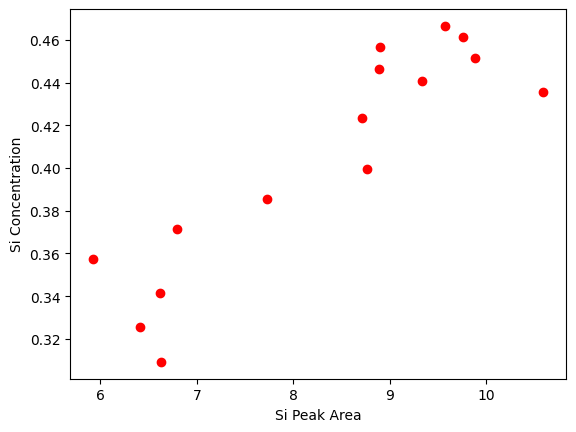

In [25]:
plt.figure()
plt.scatter(df['si_area'], df['si_concentration'], color='red')
plt.xlabel('Si Peak Area')
plt.ylabel('Si Concentration')
plt.show()

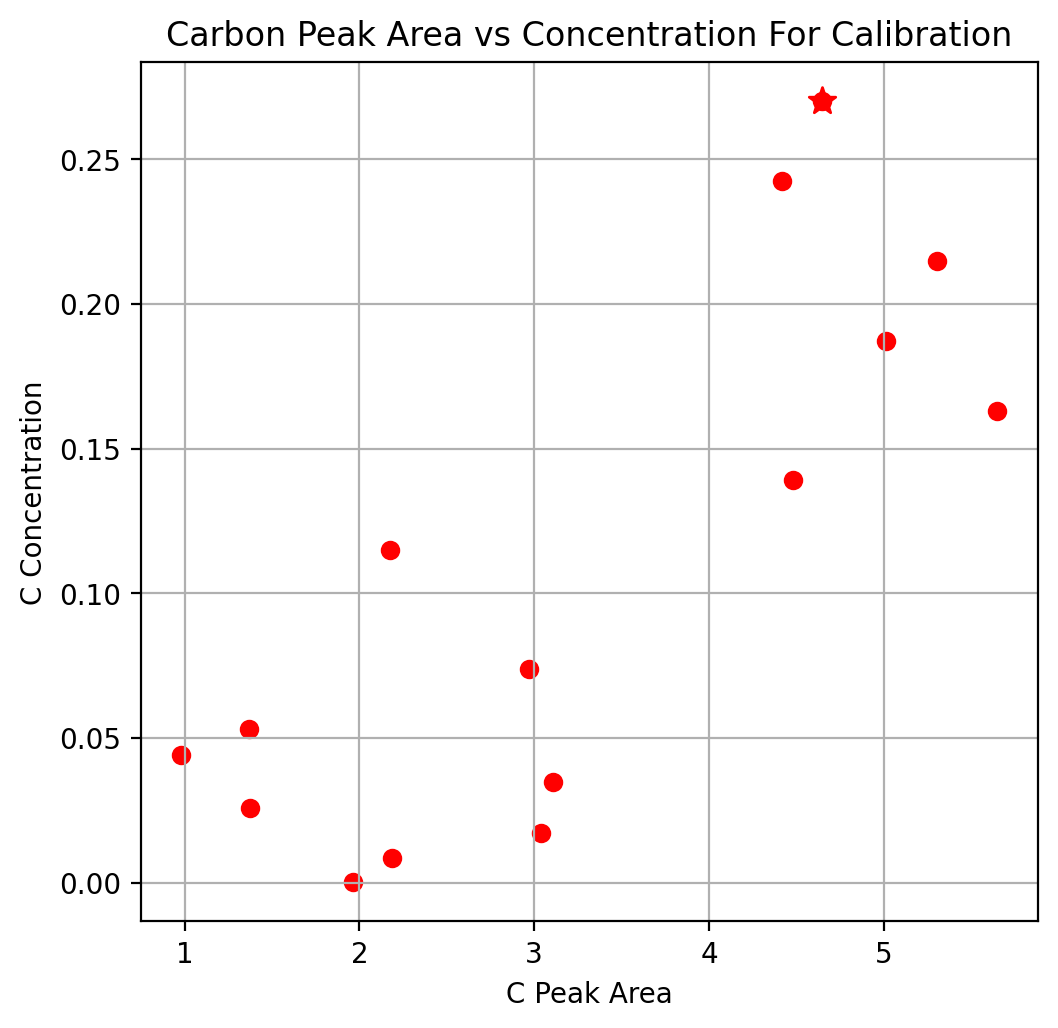

In [50]:
# graph true_comp vs areas
plt.figure(frameon=False, figsize=(5.79, 5.58), dpi=200)
plt.scatter(df['c_area'], df['c_concentration'], color='red')
# star point
plt.scatter(df.loc[14]['c_area'], df.loc[14]['c_concentration'], color='red', marker='*', s=100)
plt.xlabel('C Peak Area')
plt.ylabel('C Concentration')
plt.title('Carbon Peak Area vs Concentration For Calibration')
plt.grid()
plt.show()

# now areas vs true_comp
# plt.figure(frameon=False, figsize=(5.79, 5.58), dpi=200)
# plt.scatter(df['c_concentration'], df['c_area'], color='red')
# plt.xlabel('C Concentration')
# plt.ylabel('C Peak Area')
# plt.title('Carbon Peak Area vs Concentration For Calibration')
# plt.show()



In [40]:
df

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed,si_area,c_area,si_concentration,c_concentration
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.999999999999996, 0.0, 398.0, 554.0, 596.0,...","{'Si1': 9.575438350871856, 'Si2C1': 1.96409442...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': 0.4622427856926537, 'Si2C1': 0.0409178...",True,False,9.575438,1.964094,0.466600,0.000100
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[17.0, 0.0, 392.0, 575.0, 607.0, 694.000000000...","{'Si1': 9.76155482558933, 'Si2C1': 2.185504482...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': 0.47122733497220376, 'Si2C1': 0.049881...",True,False,9.761555,2.185504,0.461600,0.008667
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 1.0, 412.0, 579.0, 602.0, 675.0, 818.0,...","{'Si1': 8.905245056641341, 'Si2C1': 3.03880517...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': 0.42989000935741234, 'Si2C1': 0.092093...",True,False,8.905245,3.038805,0.456600,0.017233
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': 9.885984578758531, 'Si2C1': 1.37152521...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': 0.4772340318585916, 'Si2C1': 0.0129882...",True,False,9.885985,1.371525,0.451600,0.025800
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 569.0, 583.0, 643.999999999...","{'Si1': 8.89266638449909, 'Si2C1': 3.108291713...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': 0.42928278906751105, 'Si2C1': 0.095252...",True,False,8.892666,3.108292,0.446267,0.034933
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 398.0, 609.0, 600.0, 658.0, 834.0,...","{'Si1': 9.333632371315147, 'Si2C1': 0.98181116...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': 0.45056989245354084, 'Si2C1': -0.00169...",True,False,9.333632,0.981811,0.440933,0.044067
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': 10.597000132935221, 'Si2C1': 1.3673155...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': 0.511557453762667, 'Si2C1': 0.00933725...",True,False,10.597000,1.367316,0.435600,0.053200
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 401.0, 593.0, 592.0, 645.0, 802.0,...","{'Si1': 8.718305045179338, 'Si2C1': 2.97292485...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': 0.4208657048306389, 'Si2C1': 0.0900668...",True,False,8.718305,2.972925,0.423600,0.073800
8,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': 8.76123926497957, 'Si2C1': 2.176490303...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': 0.42293830272483274, 'Si2C1': 0.054352...",True,False,8.761239,2.176490,0.399600,0.115000
9,concentration_C_139_Si_3856,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 592.0, 564.0, 691.0, 870.0,...","{'Si1': 7.729043167574083, 'Si2C1': 4.48203914...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3856, 'Si2C1': 0.139}","{'Si1': 0.37311027585415113, 'Si2C1': 0.162162...",True,False,7.729043,4.482039,0.385600,0.139000


In [23]:
Analyzer.calibration

{'methods': {'Si1': 'original', 'Si2C1': 'original'},
 'weights': {'Si1': {'k1': np.float64(0.04827379893794271)},
  'Si2C1': {'k1': np.float64(0.1092636936211816),
   'k2': np.float64(22.431466970058658)}}}

# Results

In [21]:
Analyzer.applyCalibrationAreas(spec_labels)

{'concentration_C_0001_Si_4666': {'Si1': 0.4622427856926537,
  'Si2C1': 0.04091781714682608},
 'concentration_C_008666666666666666_Si_4616': {'Si1': 0.47122733497220376,
  'Si2C1': 0.049881755328130196},
 'concentration_C_017233333333333333_Si_4566': {'Si1': 0.42989000935741234,
  'Si2C1': 0.0920931835690976},
 'concentration_C_0258_Si_4516': {'Si1': 0.4772340318585916,
  'Si2C1': 0.012988273539636936},
 'concentration_C_03493333333333333_Si_44626666666666664': {'Si1': 0.42928278906751105,
  'Si2C1': 0.09525218040850074},
 'concentration_C_044066666666666664_Si_44093333333333334': {'Si1': 0.45056989245354084,
  'Si2C1': -0.0016947612186318437},
 'concentration_C_0532_Si_4356': {'Si1': 0.511557453762667,
  'Si2C1': 0.009337250259466032},
 'concentration_C_0738_Si_4236': {'Si1': 0.4208657048306389,
  'Si2C1': 0.09006680851684465},
 'concentration_C_115_Si_3996': {'Si1': 0.42293830272483274,
  'Si2C1': 0.0543524390363732},
 'concentration_C_139_Si_3856': {'Si1': 0.37311027585415113,
  'Si

In [22]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib,area_calc_failed
0,concentration_C_0001_Si_4666,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.999999999999996, 0.0, 398.0, 554.0, 596.0,...","{'Si1': 9.575438350871856, 'Si2C1': 1.96409442...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4666, 'Si2C1': 0.0001}","{'Si1': 0.4622427856926537, 'Si2C1': 0.0409178...",True,False
1,concentration_C_008666666666666666_Si_4616,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[17.0, 0.0, 392.0, 575.0, 607.0, 694.000000000...","{'Si1': 9.76155482558933, 'Si2C1': 2.185504482...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4616, 'Si2C1': 0.0086666666666666}","{'Si1': 0.47122733497220376, 'Si2C1': 0.049881...",True,False
2,concentration_C_017233333333333333_Si_4566,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 1.0, 412.0, 579.0, 602.0, 675.0, 818.0,...","{'Si1': 8.905245056641341, 'Si2C1': 3.03880517...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4566, 'Si2C1': 0.0172333333333333}","{'Si1': 0.42989000935741234, 'Si2C1': 0.092093...",True,False
3,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': 9.885984578758531, 'Si2C1': 1.37152521...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': 0.4772340318585916, 'Si2C1': 0.0129882...",True,False
4,concentration_C_03493333333333333_Si_446266666...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 569.0, 583.0, 643.999999999...","{'Si1': 8.89266638449909, 'Si2C1': 3.108291713...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4462666666666666, 'Si2C1': 0.0349333...","{'Si1': 0.42928278906751105, 'Si2C1': 0.095252...",True,False
5,concentration_C_044066666666666664_Si_44093333...,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 398.0, 609.0, 600.0, 658.0, 834.0,...","{'Si1': 9.333632371315147, 'Si2C1': 0.98181116...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4409333333333333, 'Si2C1': 0.0440666...","{'Si1': 0.45056989245354084, 'Si2C1': -0.00169...",True,False
6,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': 10.597000132935221, 'Si2C1': 1.3673155...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': 0.511557453762667, 'Si2C1': 0.00933725...",True,False
7,concentration_C_0738_Si_4236,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[23.0, 0.0, 401.0, 593.0, 592.0, 645.0, 802.0,...","{'Si1': 8.718305045179338, 'Si2C1': 2.97292485...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.4236, 'Si2C1': 0.0738}","{'Si1': 0.4208657048306389, 'Si2C1': 0.0900668...",True,False
8,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': 8.76123926497957, 'Si2C1': 2.176490303...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': 0.42293830272483274, 'Si2C1': 0.054352...",True,False
9,concentration_C_139_Si_3856,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[14.0, 0.0, 402.0, 592.0, 564.0, 691.0, 870.0,...","{'Si1': 7.729043167574083, 'Si2C1': 4.48203914...","{'Si1': {'bins': [1.60821, 1.61724, 1.62628, 1...","{'Si1': 0.3856, 'Si2C1': 0.139}","{'Si1': 0.37311027585415113, 'Si2C1': 0.162162...",True,False
